# 미니프로젝트 CNN
캐글: https://www.kaggle.com/datasets/vishalsubbiah/pokemon-images-and-types

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
import tqdm as tqdm

In [ ]:
import cv2

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import os
root_dir = "/gdrive/My Drive/data/pokemon/images/images"
image_label = os.listdir(root_dir)
# image_label.remove("test.csv")
image_label[:5]

['dartrix.jpg', 'amoonguss.png', 'bellossom.png', 'beldum.png', 'cinccino.png']

이미지 미리보기

In [ ]:
data = pd.read_csv("/gdrive/My Drive/data/pokemon/pokemon.csv")
data.head()

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN


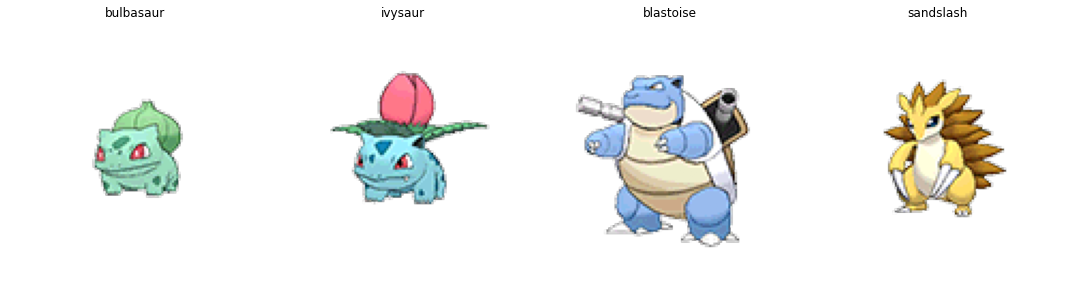

In [ ]:
import matplotlib.image as mpimg

fig,(ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 10))
ax = [ax1, ax2, ax3, ax4]
for i in range(4):
    img = mpimg.imread(root_dir+"/"+data['Name'][i**3]+'.png')
    ax[i].imshow(img)
    ax[i].set_title(data['Name'][i**3])
    ax[i].axis('off')
plt.tight_layout()
plt.show()
    

In [ ]:
data["Type1"].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [ ]:
data["Type1"].value_counts()

Water       114
Normal      105
Grass        78
Bug          72
Fire         53
Psychic      53
Rock         46
Electric     40
Poison       34
Ground       32
Dark         29
Fighting     29
Ghost        27
Dragon       27
Steel        26
Ice          23
Fairy        18
Flying        3
Name: Type1, dtype: int64

Text(0.5, 1.0, 'Pokemons type')

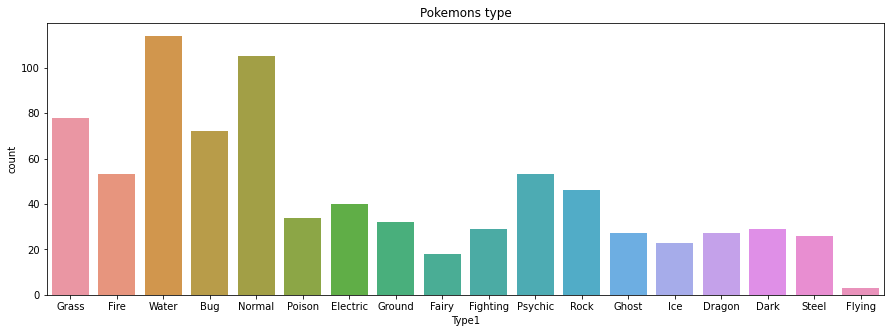

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(x= data.Type1)
plt.title('Pokemons type')

이미지 데이터셋 만들기

In [ ]:
def img_read(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

(120, 120, 3)


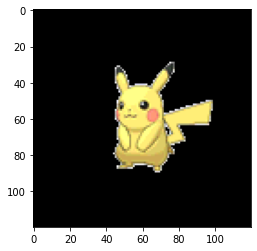

In [ ]:
# 피카츄 미리보기
img_path = f"{root_dir}/pikachu.png"
print(img_read(img_path).shape)
plt.imshow(img_read(img_path))

In [ ]:
len(image_label)

809

In [ ]:
data_dict = {}

for key, val in zip(data["Name"], data["Type1"]):
    data_dict[key] = val
print(data_dict)

{'bulbasaur': 'Grass', 'ivysaur': 'Grass', 'venusaur': 'Grass', 'charmander': 'Fire', 'charmeleon': 'Fire', 'charizard': 'Fire', 'squirtle': 'Water', 'wartortle': 'Water', 'blastoise': 'Water', 'caterpie': 'Bug', 'metapod': 'Bug', 'butterfree': 'Bug', 'weedle': 'Bug', 'kakuna': 'Bug', 'beedrill': 'Bug', 'pidgey': 'Normal', 'pidgeotto': 'Normal', 'pidgeot': 'Normal', 'rattata': 'Normal', 'raticate': 'Normal', 'spearow': 'Normal', 'fearow': 'Normal', 'ekans': 'Poison', 'arbok': 'Poison', 'pikachu': 'Electric', 'raichu': 'Electric', 'sandshrew': 'Ground', 'sandslash': 'Ground', 'nidoran-f': 'Poison', 'nidorina': 'Poison', 'nidoqueen': 'Poison', 'nidoran-m': 'Poison', 'nidorino': 'Poison', 'nidoking': 'Poison', 'clefairy': 'Fairy', 'clefable': 'Fairy', 'vulpix': 'Fire', 'ninetales': 'Fire', 'jigglypuff': 'Normal', 'wigglytuff': 'Normal', 'zubat': 'Poison', 'golbat': 'Poison', 'oddish': 'Grass', 'gloom': 'Grass', 'vileplume': 'Grass', 'paras': 'Bug', 'parasect': 'Bug', 'venonat': 'Bug', 've

In [ ]:
labels =['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying']

In [ ]:
ids = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
labels_idx = dict(zip(labels,ids))

print(labels_idx)

{'Grass': 0, 'Fire': 1, 'Water': 2, 'Bug': 3, 'Normal': 4, 'Poison': 5, 'Electric': 6, 'Ground': 7, 'Fairy': 8, 'Fighting': 9, 'Psychic': 10, 'Rock': 11, 'Ghost': 12, 'Ice': 13, 'Dragon': 14, 'Dark': 15, 'Steel': 16, 'Flying': 17}


캐글 참고: https://www.kaggle.com/code/shubhamptrivedi/pokemon-classification-model-using-tensorflow

In [ ]:
files =  os.path.join(root_dir)
File_names = os.listdir(files)

final_images = []
final_labels = []
count = 0
files =  os.path.join(root_dir)
for file in File_names:
    count += 1
    img = cv2.imread(os.path.join(root_dir, file), cv2.COLOR_BGR2GRAY) 
    label = labels_idx[data_dict[file.split(".")[0]]] 
    # append img in final_images list
    final_images.append(np.array(img))
    # append label in final_labels list
    final_labels.append(np.array(label))
    
    
# converting lists into numpy arrayn
# normalizing and reshaping the data 
final_images = np.array(final_images, dtype = np.float32)/255.0
final_labels = np.array(final_labels, dtype = np.int8).reshape(809, 1)

In [ ]:
len(final_images)

809

In [ ]:
final_images[0].shape

(120, 120, 3)

train, valid 나누기

In [ ]:

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(
    final_images, final_labels, test_size=0.6, stratify=final_labels, random_state=42)

x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((323, 120, 120, 3), (486, 120, 120, 3), (323, 1), (486, 1))

모델 구현

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(120, 120,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(18)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 43200)             0         
                                                                 
 dense_6 (Dense)             (None, 100)               4320100   
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 18)                1818      
                                                                 
Total params: 4,342,118
Trainable params: 4,342,118
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience = 8)

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=25, callbacks=[early_stop])

Epoch 1/25
11/11 [==============================] - 1s 61ms/step - loss: 0.5011 - accuracy: 0.8854 - val_loss: 3.7468 - val_accuracy: 0.1440
Epoch 2/25
11/11 [==============================] - 1s 56ms/step - loss: 0.4180 - accuracy: 0.9040 - val_loss: 3.9379 - val_accuracy: 0.1543
Epoch 3/25
11/11 [==============================] - 1s 55ms/step - loss: 0.3895 - accuracy: 0.9040 - val_loss: 4.1497 - val_accuracy: 0.1276
Epoch 4/25
11/11 [==============================] - 1s 57ms/step - loss: 0.3646 - accuracy: 0.9164 - val_loss: 4.1986 - val_accuracy: 0.1564
Epoch 5/25
11/11 [==============================] - 1s 54ms/step - loss: 0.3561 - accuracy: 0.9195 - val_loss: 4.1775 - val_accuracy: 0.1399
Epoch 6/25
11/11 [==============================] - 1s 56ms/step - loss: 0.3434 - accuracy: 0.9195 - val_loss: 4.4624 - val_accuracy: 0.1543
Epoch 7/25
11/11 [==============================] - 1s 58ms/step - loss: 0.3630 - accuracy: 0.9195 - val_loss: 4.4789 - val_accuracy: 0.1502
Epoch 8/25
11

In [ ]:
df_hist = pd.DataFrame(history.history)
df_hist.tail()

,loss,accuracy,val_loss,val_accuracy
4,0.356131,0.919505,4.177499,0.139918
5,0.343435,0.919505,4.462374,0.154321
6,0.363034,0.919505,4.478928,0.150206
7,0.352797,0.931889,4.370397,0.150206
8,0.278277,0.934985,4.436108,0.144033


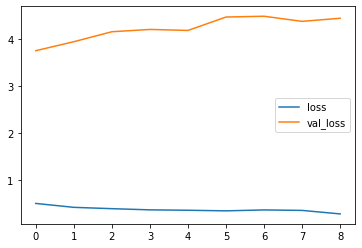

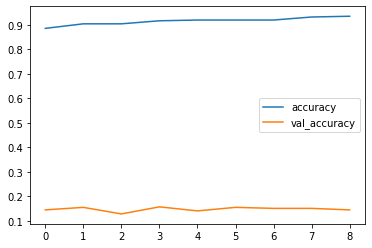

In [ ]:
df_hist[['loss', 'val_loss']].plot()
df_hist[['accuracy','val_accuracy']].plot()

In [ ]:
print("accuracy: ", history.history['accuracy'][-1])

accuracy:  0.9349845051765442
